In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

In [2]:
dataset = pd.read_csv('framingham.csv')

In [3]:
dataset.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot:>

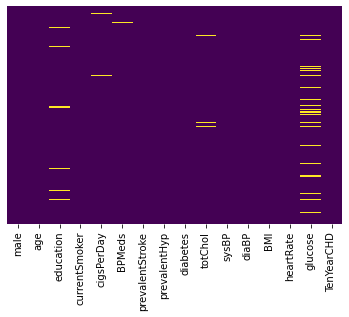

In [4]:
#check for null values if present 
sns.heatmap(dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [5]:
#education and BPmeds unimportant column so we can drop it
#glucose contibutes to diabetes, so we can find the mean of those 
#that have diabetes and those that don't 
#cholestrol depends on diabetes
#cigs per day, get the average of all smokers
dataset.drop('education', axis=1, inplace=True)
dataset.drop('BPMeds', axis=1, inplace=True)



In [6]:
dataset.groupby('diabetes')['glucose'].mean()

diabetes
0     79.489186
1    170.333333
Name: glucose, dtype: float64

In [7]:
dataset.groupby('diabetes')['totChol'].mean()


diabetes
0    236.429412
1    247.759259
Name: totChol, dtype: float64

In [8]:
dataset.groupby('currentSmoker')['cigsPerDay'].mean()

currentSmoker
0     0.000000
1    18.350605
Name: cigsPerDay, dtype: float64

In [9]:
def fill_glucose(patient):
    glucose = patient[0]
    diabetes = patient[1]
    if pd.isnull(glucose):
        if diabetes == 1:
            return 170
        else:
            return 80
        
    else:
        return glucose
    

In [10]:
def fill_totChol(patient):
    totChol = patient[0]
    diabetes = patient[1]
    if pd.isnull(totChol):
        if diabetes == 1:
            return 248
        else:
            return 236
        
    else:
        return totChol

In [11]:
def fill_cigsPerDay(patient):
    cigsPerDay = patient[0]
    currentSmoker = patient[1]
    if pd.isnull(cigsPerDay):
        if currentSmoker == 1:
            return 18
        else:
            return 0
        
    else:
        return cigsPerDay

In [12]:
dataset['glucose'] = dataset[['glucose','diabetes']].apply(fill_glucose, axis=1)

In [13]:
dataset.head()

,male,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [14]:
dataset['totChol'] = dataset[['totChol','diabetes']].apply(fill_totChol, axis=1)

In [15]:
dataset['cigsPerDay'] = dataset[['cigsPerDay','currentSmoker']].apply(fill_cigsPerDay, axis=1)

In [16]:
dataset.head()

,male,age,currentSmoker,cigsPerDay,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


<AxesSubplot:>

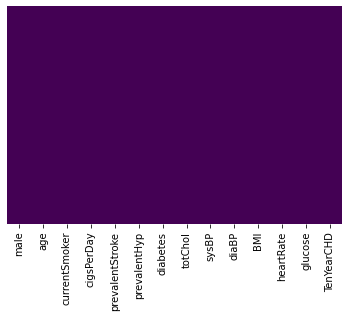

In [17]:
sns.heatmap(dataset.isnull(),yticklabels=False,
            cbar=False,cmap='viridis')

In [18]:
#from dataset for BMI of NA values are those with 0 diabetes
dataset.groupby('diabetes')['BMI'].mean()

diabetes
0    25.744730
1    28.003178
Name: BMI, dtype: float64

In [19]:
def fill_BMI(patient):
    BMI = patient[0]
    diabetes = patient[1]
    if pd.isnull(BMI):
        if diabetes == 1:
            return 28
        else:
            return 25.7
        
    else:
        return BMI
    

In [20]:
dataset['BMI'] = dataset[['BMI','diabetes']].apply(fill_BMI, axis=1)

In [21]:
dataset.groupby('currentSmoker')['heartRate'].mean()

currentSmoker
0    75.13806
1    76.63784
Name: heartRate, dtype: float64

In [22]:
def fill_heartRate(patient):
    heartRate = patient[0]
    currentSmoker = patient[1]
    if pd.isnull(heartRate):
        if currentSmoker == 1:
            return 76.6
        else:
            return 75.1
        
    else:
        return heartRate

In [23]:
dataset['heartRate'] = dataset[['heartRate','currentSmoker']].apply(fill_heartRate, axis=1)

In [24]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   currentSmoker    4238 non-null   int64  
 3   cigsPerDay       4238 non-null   float64
 4   prevalentStroke  4238 non-null   int64  
 5   prevalentHyp     4238 non-null   int64  
 6   diabetes         4238 non-null   int64  
 7   totChol          4238 non-null   float64
 8   sysBP            4238 non-null   float64
 9   diaBP            4238 non-null   float64
 10  BMI              4238 non-null   float64
 11  heartRate        4238 non-null   float64
 12  glucose          4238 non-null   float64
 13  TenYearCHD       4238 non-null   int64  
dtypes: float64(7), int64(7)
memory usage: 463.7 KB


In [25]:
from sklearn.model_selection import train_test_split
X = dataset[['male','age','currentSmoker','cigsPerDay','prevalentStroke','prevalentHyp','diabetes','totChol','sysBP','diaBP','BMI','heartRate','glucose']]
y = dataset[['TenYearCHD']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [32]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(max_iter=10000)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

c:\users\emana\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.99      0.93      1097
           1       0.48      0.06      0.10       175

    accuracy                           0.86      1272
   macro avg       0.67      0.52      0.51      1272
weighted avg       0.81      0.86      0.81      1272

